<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 2:  Multiplicación de números enteros grandes. Método tradicional vs. Método de Karatsuba</br>
# Ibarra Soto Alejandro
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

# MÉTODO DE MULTIPLICACIÓN TRADICIONAL
Usando "Divide y vencerás", podemos multiplicar dos enteros en menos complejidad de tiempo. Dividimos los números dados en dos mitades. El producto XY se puede escribir de la siguiente manera. </br>
<img src="form1.jpg" alt="header" style="display: block; margin: auto;">
Si echamos un vistazo a la fórmula anterior, hay cuatro multiplicaciones de tamaño n / 2, por lo que básicamente dividimos el problema del tamaño n en cuatro subproblemas de tamaño n / 2. Pero eso no ayuda porque la solución de recurrencia T (n) = 4T (n / 2) + O (n) es O (n ^ 2). </br>
Al calcular la complejidad de está se obtuvo que pertenece a O(n ^ 2), lo cual se obtuvo mediante el Teorema Maestro.</br>
Es importante destacar que este método de multiplicación al igual que aquel aprendido literalmente en la primaria, tienen la misma complejidad, por ello como método tradicional se considerará a aquel que emplea cuatro recursiones, para aplicar de igual forma el método de "Divide y vencerás".</br>
El método de multiplicación tradicional consiste en:</br>
El algoritmo estándar para multiplicar dos números enteros, requiere el aprendizaje previo de las tablas de multiplicar. La multiplicación se empieza desde la derecha, teniendo cuidado con la ley de los signos y con colocar las unidades de un orden bajo las unidades del mismo orden (unidades bajo unidades, decenas bajo decenas, centenas bajo centenas, etc.). Luego se suman los productos de cada cifra del segundo factor por todas las del primero.</br>
A continuación se tiene un ejemplo:</br>
Sea la multiplicación de 4103 como multiplicando y 254 como multiplicador. Se coloca el multiplicador debajo del multiplicando, haciendo coincidir las columnas de las unidades por la derecha. </br>
<img src="m1.jpg" alt="header" style="display: block; margin: auto;">
Conforme a las tablas elementales, se multiplica la cifra de unidades (4)del multiplicador por cada una de las cifras del multiplicando, empezando por las unidades (3) acarreando, en su caso, las decenas (4 × 3 = 12, acarreo de 1 unidad) como suma al resultado de la multiplicación de la cifra siguiente [(4 × 0) + 1 = 1), 1 de acarreo], continuándose de igual forma con las demás cifras del multiplicando (4103 × 4 = 16412). 
<img src="m2.jpg" alt="header" style="display: block; margin: auto;">
Se procede de igual forma con la cifra de las decenas del multiplicador con cada una de las cifras del multiplicando, si bien el resultado se escribe debajo de la fila anterior corriendo un lugar a la izquierda la cifra de las unidades. (4103 × 5 = 20515)
<img src="m3.jpg" alt="header" style="display: block; margin: auto;">
Se continúa así con todas las cifras del multiplicador. (4103 × 2 = 8206)
<img src="m4.jpg" alt="header" style="display: block; margin: auto;">
Finalmente se suman las cifras de cada una de las líneas provisionales, considerando los huecos de la derecha como ceros.
<img src="m5.jpg" alt="header" style="display: block; margin: auto;">

En este caso se llevan a casbo (2n-1)(n-1) = O(n ^ 2) sumas, y las multiplicaciones llevadas a cabo son del orden O(n ^ 2), por lo que al sumar la complejidad de ambos procedimientos, de igual forma se tiene una complejidad O(n ^ 2). </br></br>

# MÉTODO DE KARATSUBA
Este método se basa en "Divide y vencerás", ocupando la expresión mostrada en el método tradicional al dividir a la mitad los números, así el producto XY se puede escribir de la siguiente manera. </br>
<img src="form1.jpg" alt="header" style="display: block; margin: auto;"> 
Y luego se tiene que la parte difícil de este algoritmo es cambiar los dos términos del medio a alguna otra forma para que solo una multiplicación adicional sea suficiente. La siguiente es una expresión engañosa para dos términos intermedios.</br>
<img src="form2.jpg" alt="header" style="display: block; margin: auto;">
Entonces el valor final de XY se convierte en:</br>
<img src="form3.jpg" alt="header" style="display: block; margin: auto;">
Con el truco anterior, la recurrencia se convierte en T (n) = 3T (n / 2) + O (n) y la solución de esta recurrencia es O (n 1.59 ) por el Teorema Maestro.
</br></br>

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def TRF(señal):
    N = len(señal)
    if (N==2):
        return np.append([señal[0]+señal[1]],[señal[0]-señal[1]])
    else:
        TRF_pares = TRF(señal[::2])
        TRF_impares = TRF(señal[1::2])
        W_N_k=np.array([])
        for k in range(int(N/2)):
            W_N_k=np.append(W_N_k,np.exp(-2j*np.pi*k/N))
        #k=np.arange(int(N/2))
        #W_N_k = np.exp(-2j*np.pi*k/N)
        t1=TRF_pares+W_N_k*TRF_impares
        t2=TRF_pares-W_N_k*TRF_impares
        return np.append(t1,t2)

In [ ]:
def TDF(señal):
    N = len(señal)
    tfourier = np.array([])
    for k in range(N):
        x=0
        for n in range(N):
            W_N_nk=np.exp(-2j*np.pi*n*k/N)
            x=x+señal[n]*W_N_nk
        tfourier=np.append(tfourier,x)
    return tfourier

In [28]:
np.random.seed(101) #THE SEED
tam=131072
n1=np.random.random(tam)
n1

array([0.51639863, 0.57066759, 0.02847423, ..., 0.58489787, 0.01831059,
       0.56933866])

In [29]:
from time import time
start_time = time()
res=TRF(n1)
elapsed_time = time() - start_time
print(elapsed_time)
res

1.0671448707580566


array([ 6.56161562e+04 +0.j        , -6.28217095e+01-84.69601622j,
        8.95057086e+00 +3.66481635j, ...,  1.03818147e+02-17.72161489j,
        8.95057086e+00 -3.66481635j, -6.28217095e+01+84.69601622j])

In [ ]:
from time import time
start_time = time()
res=TRF(n1)
elapsed_time = time() - start_time
print(elapsed_time)
res

**Definir la función para corrimiento en arreglos**

In [2]:
#Corrimiento sobre cadenas
def corrimiento(num,ceros,leftOrRight):
    if(leftOrRight==False): #True es para agregar a la derecha y False para agregar a la izquierda
        aux=ceros
        num=num.zfill(aux)
    else:
        aux=len(num)+ceros
        num=num.ljust(aux, "0")
    return num

#Agregar ceros al principio del número
def agregarCeros(ceros,n,izq):
    if(izq==True): #True es para agregar a la izquierda y False para agregar a la derecha
        for i in range (ceros):
            n=np.append([0],n)
    else:
        aux=len(n)+ceros
        for i in range (aux):
            n=np.append(n,[0]) 
    return n

**Definir la función de multiplicación tradicional**

In [3]:
def mulTradicional(n1, n2):
    if(len(n1)==1 and len(n2)==1):
        return n1[0]*n2[0]
    if(len(n1)==len(n2) and (len(n1)%2)!=0):
        n1=agregarCeros(1,n1,True)
    if(len(n1) < len(n2)):
        if((len(n2) % 2) != 0):
            n2=agregarCeros(1,n2,True)
        n1=agregarCeros(len(n2)-len(n1),n1,True)
    if(len(n2) < len(n1)):
        if((len(n1) % 2) != 0):
            n1=agregarCeros(1,n1,True)
        n2=agregarCeros(len(n1)-len(n2),n2,True)
    m1= int(len(n1)/2)
    a=n1[:m1]
    b=n1[m1:]
    c=n2[:m1]
    d=n2[m1:]
    ac=int(mulTradicional(a,c))
    ad=int(mulTradicional(a,d))
    bc=int(mulTradicional(b,c))
    bd=int(mulTradicional(b,d))
    At=int(corrimiento(str(ac),len(n1),True))
    Bt=int(corrimiento(str(ad+bc),m1,True))
    return At+Bt+bd 

**Definir la función de multiplicación de Karatsuba**

In [4]:
def mulKaratsuba(n1, n2):
    if(len(n1)==1 and len(n2)==1):
        return n1[0]*n2[0]
    if(len(n1)==len(n2) and (len(n1)%2)!=0):
        n1=agregarCeros(1,n1,True)
    if(len(n1) < len(n2)):
        if((len(n2) % 2) != 0):
            n2=agregarCeros(1,n2,True)
        n1=agregarCeros(len(n2)-len(n1),n1,True)
    if(len(n2) < len(n1)):
        if((len(n1) % 2) != 0):
            n1=agregarCeros(1,n1,True)
        n2=agregarCeros(len(n1)-len(n2),n2,True)
    m1= int(len(n1)/2)
    a=n1[:m1]
    b=n1[m1:]
    c=n2[:m1]
    d=n2[m1:]
    ac=int(mulKaratsuba(a,c))
    abcd=int(mulKaratsuba(a+b,c+d))
    bd=int(mulKaratsuba(b,d))
    At=int(corrimiento(str(ac),len(n1),True))
    aux=int(abcd-ac-bd)
    Bt=int(corrimiento(str(aux),m1,True))
    #Bt=agregarCeros(len(At)-len(Bt),Bt,False)
    #bd=agregarCeros(len(At)-len(Bt),bd,False)
    return At+Bt+bd 

In [5]:
np.random.seed(101) #THE SEED
arr = np.random.randint(0,10,3)
print(arr)
arr2 = np.random.randint(0,10,3)
print(arr2)
mulTradicional(arr,arr2)

[1 6 7]
[9 8 4]


164328

In [6]:
np.random.seed(101) #THE SEED
arr = np.random.randint(0,10,3)
print(arr)
arr2 = np.random.randint(0,10,3)
print(arr2)
mulKaratsuba(arr,arr2)

[1 6 7]
[9 8 4]


164328

# Pruebas 

A continuación, se crearán arreglos de 128, 1024, 16384, 131072, 1048576 digitos

In [8]:
from time import time
timeTradicional = [0] * (5)
timeKaratsuba = [0] * (5)

**Dos números de 128**

**Método Tradicional**

In [9]:
np.random.seed(101) #THE SEED
tam=128
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulTradicional(n1,n2))
elapsed_time = time() - start_time
timeTradicional[0]=elapsed_time

[1 6 7 9 8 4 8 5 0 5 8 1 3 8 3 3 2 8 9 3 7 0 9 7 9 8 4 3 3 7 4 8 7 6 9 4 2
 7 7 7 0 4 1 8 3 1 8 4 3 2 3 3 7 4 8 6 3 7 6 5 6 9 2 2 1 3 3 3 4 5 9 5 8 3
 6 8 7 5 7 5 4 4 7 3 2 3 2 9 3 5 6 6 5 5 1 7 4 7 4 5 1 6 9 2 6 3 8 1 7 4 1
 8 4 0 4 2 5 8 1 8 4 6 9 4 3 1 4 4]
[4 2 3 1 7 4 0 6 7 4 0 7 2 7 9 7 6 5 2 8 6 1 1 9 9 2 0 2 2 8 9 6 6 9 4 0 4
 9 1 6 7 8 0 0 8 7 0 6 7 7 4 3 9 8 1 2 6 5 2 6 1 2 5 9 3 3 5 2 1 5 3 7 9 3
 8 6 8 7 6 5 1 5 7 4 1 2 3 2 7 3 2 9 7 4 5 5 9 2 6 5 5 8 9 1 9 4 2 3 0 1 7
 9 6 9 5 6 6 6 1 5 2 7 0 7 0 5 0 4]
710868324833281283087202688420362638442815543681419364129698569465022798201267314890030677313348229410472419186728131104555042182616367919463503244825220271917247828043542709055633577678095116020487730420874090333464045326756048742916477470611757767424576


**Método Karatsuba**

In [10]:
np.random.seed(101) #THE SEED
tam=128
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulKaratsuba(n1,n2))
elapsed_time = time() - start_time
timeKaratsuba[0]=elapsed_time

[1 6 7 9 8 4 8 5 0 5 8 1 3 8 3 3 2 8 9 3 7 0 9 7 9 8 4 3 3 7 4 8 7 6 9 4 2
 7 7 7 0 4 1 8 3 1 8 4 3 2 3 3 7 4 8 6 3 7 6 5 6 9 2 2 1 3 3 3 4 5 9 5 8 3
 6 8 7 5 7 5 4 4 7 3 2 3 2 9 3 5 6 6 5 5 1 7 4 7 4 5 1 6 9 2 6 3 8 1 7 4 1
 8 4 0 4 2 5 8 1 8 4 6 9 4 3 1 4 4]
[4 2 3 1 7 4 0 6 7 4 0 7 2 7 9 7 6 5 2 8 6 1 1 9 9 2 0 2 2 8 9 6 6 9 4 0 4
 9 1 6 7 8 0 0 8 7 0 6 7 7 4 3 9 8 1 2 6 5 2 6 1 2 5 9 3 3 5 2 1 5 3 7 9 3
 8 6 8 7 6 5 1 5 7 4 1 2 3 2 7 3 2 9 7 4 5 5 9 2 6 5 5 8 9 1 9 4 2 3 0 1 7
 9 6 9 5 6 6 6 1 5 2 7 0 7 0 5 0 4]
710868324833281283087202688420362638442815543681419364129698569465022798201267314890030677313348229410472419186728131104555042182616367919463503244825220271917247828043542709055633577678095116020487730420874090333464045326756048742916477470611757767424576


**Dos números de 1024**

**Método Tradicional**

In [12]:
np.random.seed(101) #THE SEED
tam=1024
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulTradicional(n1,n2))
elapsed_time = time() - start_time
timeTradicional[1]=elapsed_time

[1 6 7 ... 8 1 0]
[3 9 0 ... 3 4 9]
6558054421655402558797708611824032372204333135958620154283518744749477206935062813054777400404417229554545984490808708375939724547468231894220165557154714934610953803121112198875783736086307728905209426152260719802285782527364261783660488184414445978748024297880598251821248002838860714744264565609842814632428349531641736372225169794148183431391610519234653881465950961243450904554754355831202927966538468857284459296661223631338086841075254806993771182292789097876076921558613674128522509513450913240051724725383062061598291858971854143792275637534220187567354515971743008909625460123727851280013328476358946563614135231653608308084609106978441103437449855086593215606393328471382723225823926212154302631438866342002822177569161626519053958647992423616276447956831085372549356116711007439589094240348018596652943435409695501168677796532373050931126925285244047015185439225841886658482430597976679993494130242980533224348997959460907416091822267941345220706493010

**Método Karatsuba**

In [13]:
np.random.seed(101) #THE SEED
tam=1024
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulKaratsuba(n1,n2))
elapsed_time = time() - start_time
timeKaratsuba[1]=elapsed_time

[1 6 7 ... 8 1 0]
[3 9 0 ... 3 4 9]
6558054421655402558797708611824032372204333135958620154283518744749477206935062813054777400404417229554545984490808708375939724547468231894220165557154714934610953803121112198875783736086307728905209426152260719802285782527364261783660488184414445978748024297880598251821248002838860714744264565609842814632428349531641736372225169794148183431391610519234653881465950961243450904554754355831202927966538468857284459296661223631338086841075254806993771182292789097876076921558613674128522509513450913240051724725383062061598291858971854143792275637534220187567354515971743008909625460123727851280013328476358946563614135231653608308084609106978441103437449855086593215606393328471382723225823926212154302631438866342002822177569161626519053958647992423616276447956831085372549356116711007439589094240348018596652943435409695501168677796532373050931126925285244047015185439225841886658482430597976679993494130242980533224348997959460907416091822267941345220706493010

**Dos números de 16384**

**Método Tradicional**

In [16]:
np.random.seed(101) #THE SEED
tam=16384
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulTradicional(n1,n2))
elapsed_time = time() - start_time
timeTradicional[2]=elapsed_time

[1 6 7 ... 0 9 8]
[6 2 3 ... 2 6 5]
1046901361608158010387260370020184339507536334692936338156457955909752004613688920095630919820165758080492381418398269190554516295697101335537107586733440112478346782378791876425074028587490661271945603837557732387944168949174630812285224808931841368170600660252563754222351675835799905206088284617759340708133876606974741576181211099400220017812804911753763224063415402225196590582099746053972801661105900036071040303870389021049383349078055419436289771967629368634185206527111542729228052654305751483075651207449572492918021667630471537194610357029129553592951243742708972554803064469102431650273595717573491773222619988828210832207241082521933630356258475983294593897974662441027215680097120213876553676557889044466935044693472300649455706886399976319949635382689573884720482928168600604322442006355620720502397145534669084613800911245780443259323773109052529602040228773704375254481407511365130944644525314752798251931495767926493105678313980486594156947079961

**Método Karatsuba**

In [14]:
np.random.seed(101) #THE SEED
tam=16384
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulKaratsuba(n1,n2))
elapsed_time = time() - start_time
timeKaratsuba[2]=elapsed_time

[1 6 7 ... 0 9 8]
[6 2 3 ... 2 6 5]


C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


1046901361608158010387260370020184339507536334692936338156457955909752004613688920095630919820165758080492381418398269190554516295697101335537107586733440112478346782378791876425074028587490661271945603837557732387944168949174630812285224808931841368170600660252563754222351675835799905206088284617759340708133876606974741576181211099400220017812804911753763224063415402225196590582099746053972801661105900036071040303870389021049383349078055419436289771967629368634185206527111542729228052654305751483075651207449572492918021667630471537194610357029129553592951243742708972554803064469102431650273595717573491773222619988828210832207241082521933630356258475983294593897974662441027215680097120213876553676557889044466935044693472300649455706886399976319949635382689573884720482928168600604322442006355620720502397145534669084613800911245780443259323773109052529602040228773704375254481407511365130944644525314752798251931495767926493105678313980486594156947079961856791953385827229721436768051107989

**Dos números de 131072**

**Método Tradicional**

In [ ]:
np.random.seed(101) #THE SEED
tam=131072
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulTradicional(n1,n2))
elapsed_time = time() - start_time
timeTradicional[3]=elapsed_time

**Método Karatsuba**

In [17]:
np.random.seed(101) #THE SEED
tam=131072
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulKaratsuba(n1,n2))
elapsed_time = time() - start_time
timeKaratsuba[3]=elapsed_time

[1 6 7 ... 5 9 9]
[5 0 1 ... 9 8 6]


C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


8423472741232899777061151011732872579744235217308336968365905977354620017002885931126374533573822315225540127350768107289705142333720776693832047127081208357909426819233220600017203737262371694148392981550843629961799992309447669661643702567427822140824582280622046584538125638321180401165001020466833736473871440675873211425343164044976499484585058320967435136305442525556036128173436839106706621287708849158962879867577267847551017774805276730914667908517661117914747209957399661470994796006630560906712969278370444059161388079375768495915305432992921279978446800948086837646848387185466010400378135155095876126841945260899585686915497407067940005262940346148420121158615314215088789178986096632092348103619062005435574759057030240346431709430782657158400364025713848430955677224926037089050633704528357114604174123061999482755714979651315332796281378151649860259708592267883943626983268673505932175042423530923790153746354032605570713248609199446344122877010085577846992640301698519562980546617549

**Dos números de 1048576**

**Método Tradicional**

In [ ]:
np.random.seed(101) #THE SEED
tam=1048576
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulTradicional(n1,n2))
elapsed_time = time() - start_time
timeTradicional[4]=elapsed_time

**Método Karatsuba**

In [18]:
np.random.seed(101) #THE SEED
tam=1048576
n1 = np.random.randint(0,10,tam)
n2 = np.random.randint(0,10,tam)
print(n1)
print(n2)
start_time = time()
print(mulKaratsuba(n1,n2))
elapsed_time = time() - start_time
timeKaratsuba[4]=elapsed_time

[1 6 7 ... 4 1 7]
[7 4 6 ... 6 8 6]


C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


1253562461938586341188898400174099509113545884718013084611557130477834252088822298800041812683663904345603813236159926190210575326517206639199741589084052525402346931418758708460182108624735208072086160116684827070185039816861379710546387744521862514319430259445331967590610836784954270558045834510889445996910288658019420012382862930207963685702832294425808671563136612357407678065031239060523871044263660787011184675886898564852634436404006944555800374780502497024496896143415775905599953666070172580104535928814080182008042811407950232337736158043761098035188745797355530833121484994811412126502100169637424331463447898786053331683411182868441905094225669696919815727492125558047000775042915565957019298135169462750183094336701993809607295341988487199530105974982047815837719452481641878477204045148872727359786455357605631089162805401668140892177870487244601815350824749868387630697425122889378953478726899954455126257285682302181169181544286510282643409603845609119846444716281177012018619255327

# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: El método tradicional para números de 131072 y 1048576 dígitos no terminaba pasadas más de 5 horas y 8 horas respectivamente, dejando más tiempo al segundo caso por la cantidad de digitos, sin embargo, ninguno de los dos terminaba, es por ello que se detuvieron**</br></br>
**Si se desea obtener los tiempos reales eliminar la siguiente celda y correr las celdas que tienen el método tradicional para 131072 y 1048576 datos**

In [29]:
timeTradicional[3]=18000
timeTradicional[4]=28800

In [30]:
print("Método:\t\t128 digitos\t1024 digitos\t16384 datos\t\t131072 digitos\t\t\t1048576 digitos\nTradicional\t%.10f" %timeTradicional[0], "\t%.10f" %timeTradicional[1], "\t%.10f" %timeTradicional[2], "\t%.10f" %timeTradicional[3], "\t\t%.10f" %timeTradicional[4], "\nKaratsuba\t%.10f" %timeKaratsuba[0], "\t%.10f" %timeKaratsuba[1], "\t%.10f" %timeKaratsuba[2], "\t\t%.10f" %timeKaratsuba[3], "\t\t%.10f" %timeKaratsuba[4])

Método:		128 digitos	1024 digitos	16384 datos		131072 digitos			1048576 digitos
Tradicional	0.0976483822 	3.3173639774 	1169.3303256035 	18000.0000000000 		28800.0000000000 
Karatsuba	0.0211098194 	0.2110304832 	32.9790277481 		1138.9961524010 		11965.3538191319


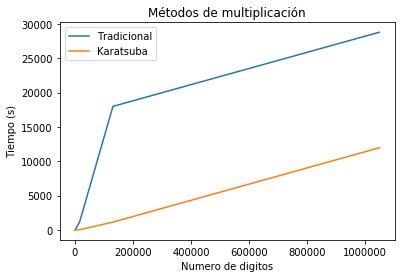

In [31]:
n=[128,1024,16384,131072,1048576]
plt.plot(n,timeTradicional,label="Tradicional")
plt.plot(n,timeKaratsuba,label="Karatsuba")

plt.xlabel('Numero de digitos')
plt.ylabel('Tiempo (s)')

plt.title("Métodos de multiplicación")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró visualizar otra aplicación de la técnica de programación de "Divide y vencerás", en este caso en particular se hizo
un análisis de diferentes métodos que se pueden usar para llevar a cabo una multiplicación, uno de ellos es el que se estudio en la primaria, solo que en este caso
no se realizo de forma literal, sino que se basó igualmente en divide y vencerás, así los dos numeros se dividian a la mitad, y posteriormente se multiplicaba a*c, a*d, b*c y b*d, de forma que para formar el resultado final se tiene que (a*c)x10^n + (a*d + b*c) x10^(n/2) + bd. De este modo se dio lugar a la implementación del
método de multiplicación tradicional.

Para llevar a cabo el algoritmo de Karatsuba se hace uso de que se ha calculado a*c y b*d, y teniendo esos datos se ocupa la igualdad (a+b)(c+d)=a*c+a*d+b*c+b*d,
así a*d+b*c = (a+b)(c+d)-a*c-b*d, de esta forma usando el algoritmo de Karatsuba se hace uso unicamente de 3 recursiones, lo cual reduce el tiempo de ejecución de
este algoritmo, y con esto se favorece que sea más óptimo este, y se puede observar en la complejidad que tienen, pues el método tradicional está en O(n^2), mientras
que el algoritmo de Karatsuba está en O(n^1.59).

Tras observar los dos algoritmos que se programaron aquí, analizar su complejidad y ver los tiempos necesarios para llevar a cabo con las diferentes pruebas
es que se puede apreciar que el método de Karatsuba al reducir el número de recursiones resulta ser más efectivo, sin embargo, existe un rango de valores en los que
el método tradicional resultaría más rápido, y esto se debe a que la multiplicación (a+b)(c+d) puede llevar a una multiplicación de valores más grandes haciendo más 
tardado el obtener el resultado.

Es importante destacar que es conveniente hacer un análisis de los algoritmos que se desarrollen o implementen, siempre buscando reducir la complejidad que presentan
y se puede observar en el caso actual, donde no se visualizaba de manera clara la agrupación que se podía hacer que dio lugar a obtener una menor complejidad, por 
ello se deben considerar todas las posibilidades al analizar un algoritmo.

También se puede ver la utilidad de la técnica "Divide y vencerás", pues gracias a esta un problema grande se resuelve facilmente llevando a cabo la misma operación
pero con una cantidad de datos menor a la original, y al final todos los resultados se combinan, y esta técnica se pudo ver en el proceso de multiplicación, en ese
sentido, al desarrollar algoritmos con está técnica y buscano siempre la menor cantidad de recursiones posibles es que se puede obtener un mejor tiempo de
ejecución.
